# Criação dos Sinais Analisados

In [1]:
import sys
sys.path.append('../')
from pacote import pantompkins
from pacote import batimentos
from pacote import filtro
import pandas as pd
import matplotlib.pyplot as plt

## Leitura de Arquivos

In [2]:
codigo = [111975006] # codigo da arritmia
leads = [0] # as derivacoes do sinal
diretorio = '../data/' # onde esta localizado as bases com arquivos dos sinais
n_Files = 100

In [3]:
ecg_sig = batimentos.records(diretorio, codigo, leads, n_Files)

/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/batimentos.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_frame.loc[data_frame['Dx'] == codigo[x]])
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/batimentos.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  records = records.append(aux)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/batimentos.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  records = records.append(aux)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/batimentos.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  records = records.append(aux)
/hom

/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/batimentos.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  records = records.append(aux)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/batimentos.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  records = records.append(aux)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/batimentos.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  records = records.append(aux)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/batimentos.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  records = records.append(aux)
/home/cgalvao/Documents/GitHub/ic-ec

/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/batimentos.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  records = records.append(aux)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/batimentos.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  records = records.append(aux)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/batimentos.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  records = records.append(aux)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/batimentos.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  records = records.append(aux)
/home/cgalvao/Documents/GitHub/ic-ec

In [4]:
ecg_sig = ecg_sig.reset_index()
ecg_sig = ecg_sig.drop(['index'], axis=1)
print(f'Shape: {ecg_sig.shape}')
ecg_sig.head()

Shape: (100, 5004)


,0,1,2,3,4,5,6,7,8,9,...,4994,4995,4996,4997,4998,4999,arritmia,leads,fs,arquivo
0,-0.230,-0.230,-0.230,-0.230,-0.230,-0.230,-0.223,-0.211,-0.200,-0.195,...,-0.005,-0.005,-0.005,-0.005,-0.005,-0.005,111975006,0,500,HR12039
1,0.015,0.015,0.015,0.016,0.014,0.015,0.032,0.032,0.035,0.056,...,0.030,0.030,0.030,0.030,0.030,0.030,111975006,0,500,HR12682
2,0.000,-0.005,-0.005,-0.005,-0.005,-0.010,-0.015,-0.020,-0.010,0.005,...,0.015,0.015,0.010,0.005,0.020,0.024,111975006,0,500,JS04714
3,-0.020,-0.020,-0.020,-0.020,-0.020,-0.020,-0.024,-0.029,-0.030,-0.031,...,-0.075,-0.075,-0.075,-0.075,-0.075,-0.075,111975006,0,500,HR05765
4,0.166,0.146,0.146,0.132,0.176,0.176,0.161,0.127,0.102,0.107,...,-0.054,-0.063,-0.024,-0.054,-0.083,-0.068,111975006,0,500,JS16353


## Separar beats

Dividir os batimentos em treinamento, validação; teste

90% --- 10%

In [5]:
# vetor de arquivos unicos com tamanho de 10% do total
arq_teste = [ecg_sig['arquivo'].unique()[x] for x in range(int(len(ecg_sig['arquivo'].unique())*0.1))]

In [6]:
# Criar data Frame de Teste
test_df = pd.DataFrame()
for x in range(len(arq_teste)):
    test_df = test_df.append(ecg_sig.loc[lambda ecg_sig: ecg_sig['arquivo'] == arq_teste[x]])

print(f'Shape: {test_df.shape}')
test_df.head()


Shape: (10, 5004)


/tmp/ipykernel_17922/1047190962.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(ecg_sig.loc[lambda ecg_sig: ecg_sig['arquivo'] == arq_teste[x]])
/tmp/ipykernel_17922/1047190962.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(ecg_sig.loc[lambda ecg_sig: ecg_sig['arquivo'] == arq_teste[x]])
/tmp/ipykernel_17922/1047190962.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(ecg_sig.loc[lambda ecg_sig: ecg_sig['arquivo'] == arq_teste[x]])
/tmp/ipykernel_17922/1047190962.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(ecg_sig.loc[l

,0,1,2,3,4,5,6,7,8,9,...,4994,4995,4996,4997,4998,4999,arritmia,leads,fs,arquivo
0,-0.230,-0.230,-0.230,-0.230,-0.230,-0.230,-0.223,-0.211,-0.200,-0.195,...,-0.005,-0.005,-0.005,-0.005,-0.005,-0.005,111975006,0,500,HR12039
1,0.015,0.015,0.015,0.016,0.014,0.015,0.032,0.032,0.035,0.056,...,0.030,0.030,0.030,0.030,0.030,0.030,111975006,0,500,HR12682
2,0.000,-0.005,-0.005,-0.005,-0.005,-0.010,-0.015,-0.020,-0.010,0.005,...,0.015,0.015,0.010,0.005,0.020,0.024,111975006,0,500,JS04714
3,-0.020,-0.020,-0.020,-0.020,-0.020,-0.020,-0.024,-0.029,-0.030,-0.031,...,-0.075,-0.075,-0.075,-0.075,-0.075,-0.075,111975006,0,500,HR05765
4,0.166,0.146,0.146,0.132,0.176,0.176,0.161,0.127,0.102,0.107,...,-0.054,-0.063,-0.024,-0.054,-0.083,-0.068,111975006,0,500,JS16353


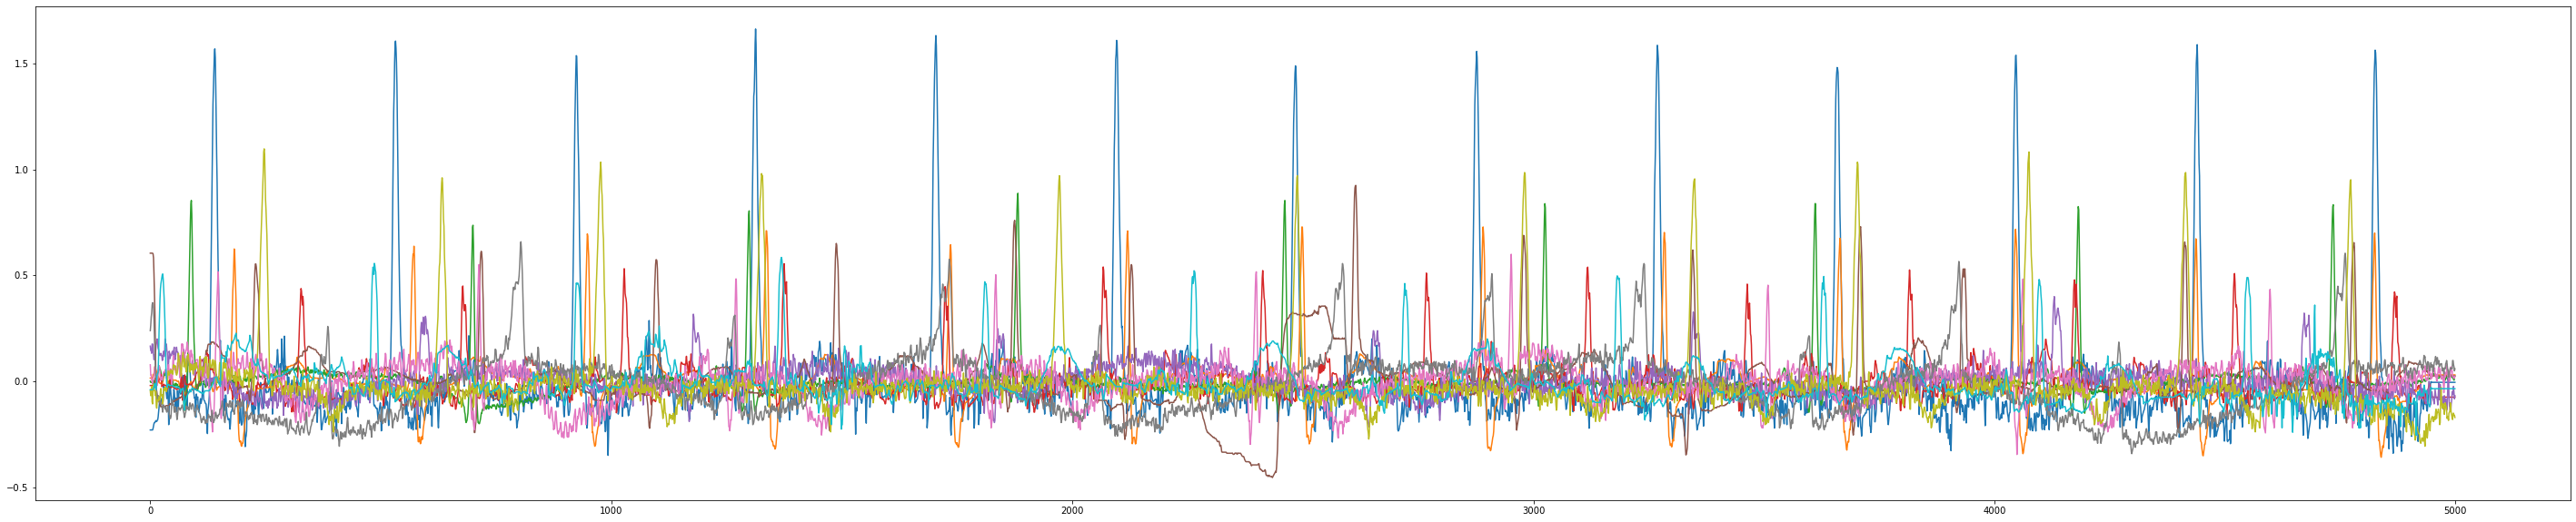

In [7]:
plt.figure(figsize=(50,10))
plt.plot(test_df.iloc[:,:-4].T);

In [8]:
# Criar Data Frame de Treino / Validacao
index_ecg = set(ecg_sig.index)
index_test = set(test_df.index)

train_val_df = pd.DataFrame(ecg_sig.iloc[list(index_ecg-index_test)])


print(f'Shape: {train_val_df.shape}')
train_val_df.head()

Shape: (90, 5004)


,0,1,2,3,4,5,6,7,8,9,...,4994,4995,4996,4997,4998,4999,arritmia,leads,fs,arquivo
10,-0.102,-0.078,-0.054,-0.059,-0.093,-0.117,-0.117,-0.107,-0.098,-0.137,...,0.015,0.034,0.078,0.063,0.049,0.039,111975006,0,500,JS12296
11,-0.065,-0.065,-0.065,-0.065,-0.065,-0.065,-0.061,-0.060,-0.060,-0.060,...,0.035,0.035,0.035,0.035,0.035,0.035,111975006,0,500,HR10109
12,0.005,0.034,0.015,-0.005,-0.024,0.044,-0.024,-0.029,0.024,0.068,...,0.000,0.015,0.044,0.020,-0.020,-0.039,111975006,0,500,JS14043
13,0.581,0.615,0.634,0.644,0.673,0.654,0.659,0.673,0.649,0.630,...,0.034,0.054,0.049,0.010,0.000,0.020,111975006,0,500,JS32175
14,0.029,0.029,0.029,0.029,0.039,0.039,0.039,0.039,0.039,0.039,...,-0.063,-0.059,-0.098,-0.073,-0.063,-0.078,111975006,0,500,JS27852


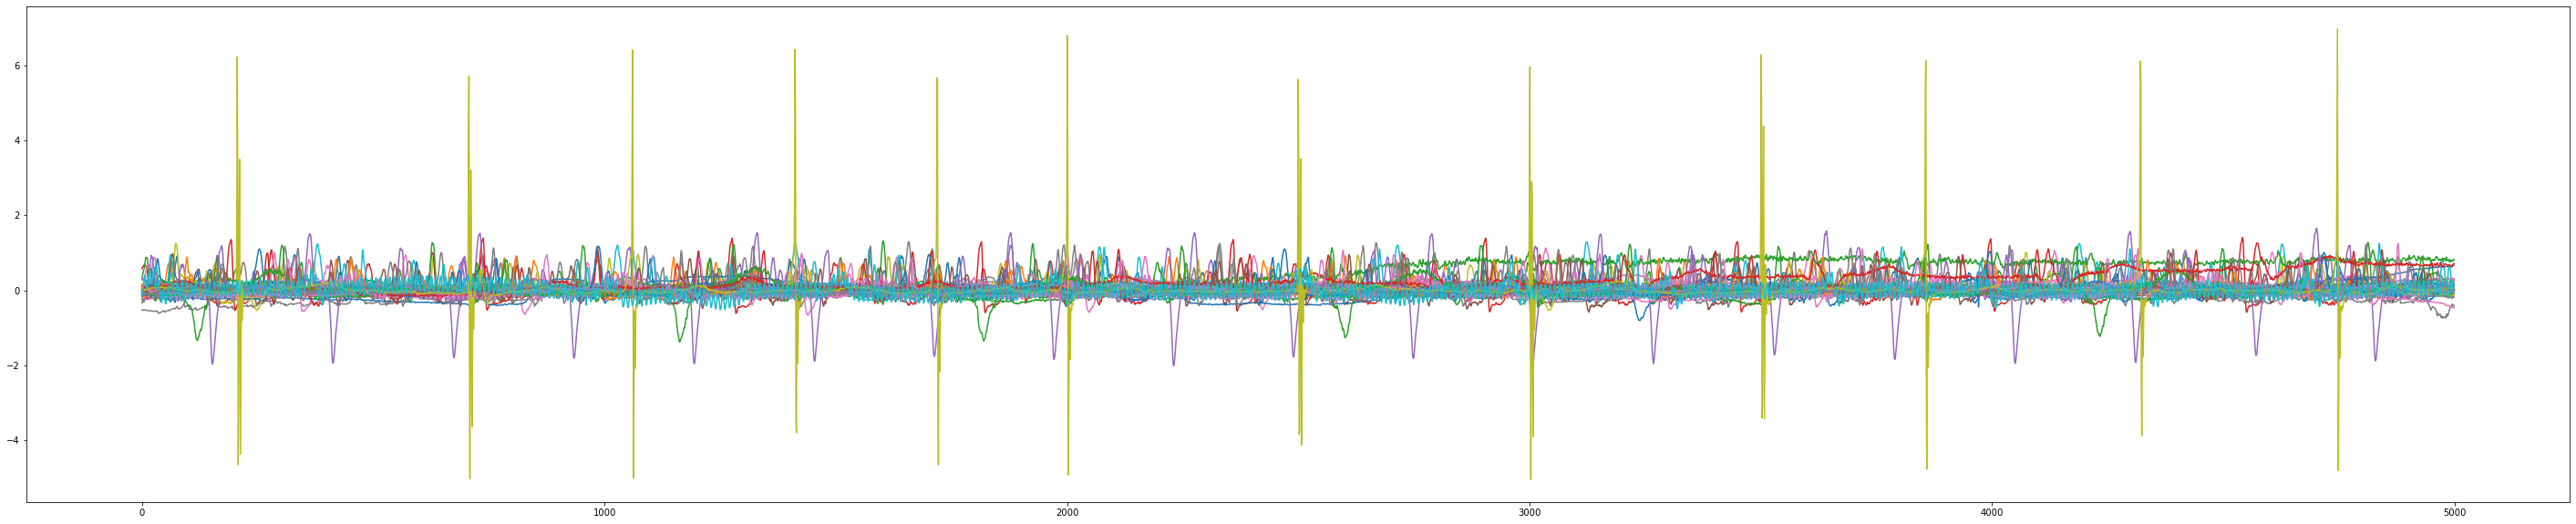

In [9]:
plt.figure(figsize=(50,10))
plt.plot(train_val_df.iloc[:,:-4].T);

## Pantompkins

Aplicar o algoritmo de PanTompkins para segmentação dos batimentos

In [10]:
# Aplicar PanTompkins na Data Frame de Teste
beats_teste = pd.DataFrame()
N = len(test_df)
for x in range(N):
    print(str(x)+"/"+str(N-1))
    beats_teste = beats_teste.append(pantompkins.batimentos(
        test_df.iloc[x,:-4],#sinal
        test_df.iloc[x, -1],#codigo
        test_df.iloc[x, -2],#frequencia
        test_df.iloc[x, -3]))#lead

0/9


/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/tmp/ipykernel_17922/96926992.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_teste = beats_teste.append(pantompkins.batimentos(


1/9


/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/tmp/ipykernel_17922/96926992.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_teste = beats_teste.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


2/9


/tmp/ipykernel_17922/96926992.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_teste = beats_teste.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


3/9


/tmp/ipykernel_17922/96926992.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_teste = beats_teste.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


4/9


/tmp/ipykernel_17922/96926992.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_teste = beats_teste.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


5/9


/tmp/ipykernel_17922/96926992.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_teste = beats_teste.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


6/9


/tmp/ipykernel_17922/96926992.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_teste = beats_teste.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


7/9


/tmp/ipykernel_17922/96926992.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_teste = beats_teste.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


8/9


/tmp/ipykernel_17922/96926992.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_teste = beats_teste.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


9/9


/tmp/ipykernel_17922/96926992.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_teste = beats_teste.append(pantompkins.batimentos(


In [11]:
print(f'Shape: {beats_teste.shape}')
beats_teste.head(10)

Shape: (107, 303)


,0,1,2,3,4,5,6,7,8,9,...,293,294,295,296,297,298,299,300,301,302
0,-0.085,-0.105,-0.107,-0.101,-0.095,-0.038,-0.044,-0.080,-0.110,-0.130,...,-0.106,-0.055,-0.049,-0.047,-0.047,-0.076,-0.110,-0.073,HR12039,0
1,-0.150,-0.123,-0.105,-0.091,-0.098,-0.120,-0.061,-0.093,-0.132,-0.128,...,-0.013,-0.040,-0.030,0.021,0.026,-0.038,-0.081,-0.040,HR12039,0
2,-0.040,-0.052,-0.056,-0.087,-0.077,0.020,-0.009,-0.058,-0.062,-0.065,...,0.027,0.041,-0.040,-0.071,-0.062,-0.050,-0.043,-0.035,HR12039,0
3,0.030,0.005,-0.012,-0.031,-0.076,-0.079,-0.010,-0.026,-0.116,-0.124,...,0.125,0.105,0.094,0.080,0.018,-0.011,-0.008,-0.004,HR12039,0
4,-0.070,-0.070,-0.066,-0.065,-0.063,-0.060,-0.055,-0.030,-0.054,-0.069,...,0.082,0.084,0.097,0.120,0.072,0.012,-0.011,0.016,HR12039,0
5,-0.040,-0.040,0.003,-0.026,-0.053,-0.012,0.035,0.045,0.046,0.055,...,-0.021,-0.011,-0.002,0.010,0.013,0.029,0.016,-0.040,HR12039,0
6,-0.020,-0.055,0.000,0.096,0.089,-0.020,-0.083,-0.093,-0.040,0.036,...,-0.016,-0.055,-0.035,-0.063,0.030,0.061,-0.028,-0.060,HR12039,0
7,-0.119,-0.120,-0.127,-0.069,-0.022,-0.026,-0.025,-0.020,-0.022,-0.014,...,-0.010,-0.059,-0.080,-0.105,-0.133,-0.125,-0.110,-0.093,HR12039,0
8,-0.068,-0.042,-0.010,-0.040,-0.039,-0.063,-0.105,-0.129,-0.135,-0.139,...,-0.040,-0.086,-0.089,-0.083,-0.069,-0.040,-0.056,-0.160,HR12039,0
9,0.020,-0.060,-0.091,-0.091,-0.096,-0.100,-0.106,-0.123,-0.082,-0.024,...,0.145,0.126,0.100,-0.011,-0.070,-0.110,-0.140,-0.105,HR12039,0


In [12]:
beats_teste = beats_teste.reset_index()
beats_teste = beats_teste.drop(['index'], axis=1)
beats_teste.head(10)

,0,1,2,3,4,5,6,7,8,9,...,293,294,295,296,297,298,299,300,301,302
0,-0.085,-0.105,-0.107,-0.101,-0.095,-0.038,-0.044,-0.080,-0.110,-0.130,...,-0.106,-0.055,-0.049,-0.047,-0.047,-0.076,-0.110,-0.073,HR12039,0
1,-0.150,-0.123,-0.105,-0.091,-0.098,-0.120,-0.061,-0.093,-0.132,-0.128,...,-0.013,-0.040,-0.030,0.021,0.026,-0.038,-0.081,-0.040,HR12039,0
2,-0.040,-0.052,-0.056,-0.087,-0.077,0.020,-0.009,-0.058,-0.062,-0.065,...,0.027,0.041,-0.040,-0.071,-0.062,-0.050,-0.043,-0.035,HR12039,0
3,0.030,0.005,-0.012,-0.031,-0.076,-0.079,-0.010,-0.026,-0.116,-0.124,...,0.125,0.105,0.094,0.080,0.018,-0.011,-0.008,-0.004,HR12039,0
4,-0.070,-0.070,-0.066,-0.065,-0.063,-0.060,-0.055,-0.030,-0.054,-0.069,...,0.082,0.084,0.097,0.120,0.072,0.012,-0.011,0.016,HR12039,0
5,-0.040,-0.040,0.003,-0.026,-0.053,-0.012,0.035,0.045,0.046,0.055,...,-0.021,-0.011,-0.002,0.010,0.013,0.029,0.016,-0.040,HR12039,0
6,-0.020,-0.055,0.000,0.096,0.089,-0.020,-0.083,-0.093,-0.040,0.036,...,-0.016,-0.055,-0.035,-0.063,0.030,0.061,-0.028,-0.060,HR12039,0
7,-0.119,-0.120,-0.127,-0.069,-0.022,-0.026,-0.025,-0.020,-0.022,-0.014,...,-0.010,-0.059,-0.080,-0.105,-0.133,-0.125,-0.110,-0.093,HR12039,0
8,-0.068,-0.042,-0.010,-0.040,-0.039,-0.063,-0.105,-0.129,-0.135,-0.139,...,-0.040,-0.086,-0.089,-0.083,-0.069,-0.040,-0.056,-0.160,HR12039,0
9,0.020,-0.060,-0.091,-0.091,-0.096,-0.100,-0.106,-0.123,-0.082,-0.024,...,0.145,0.126,0.100,-0.011,-0.070,-0.110,-0.140,-0.105,HR12039,0


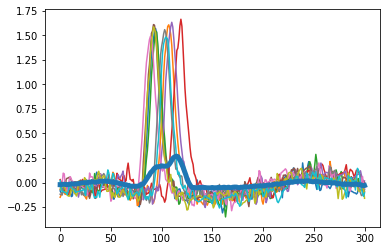

In [13]:
# Visualisar um batimento de teste
plt.plot(beats_teste.iloc[:10,:-2].T);
plt.plot(beats_teste.iloc[:,:-2].T.mean(axis=1),linewidth=5);

In [14]:
# Aplicar PanTompkins na Data Frame de Teste
beats_train_val = pd.DataFrame()
N = len(train_val_df)
for x in range(N):
    print(str(x)+"/"+str(N-1))
    beats_train_val = beats_train_val.append(pantompkins.batimentos(
        train_val_df.iloc[x,:-4],#sinal
        train_val_df.iloc[x, -1],#codigo
        train_val_df.iloc[x, -2],#frequencia
        train_val_df.iloc[x, -3]))#lead

0/89


/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, igno

1/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


2/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


3/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


4/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


5/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


6/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


7/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


8/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


9/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


10/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


11/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


12/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


13/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


14/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


15/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


16/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


17/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(


18/89


/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, igno

19/89


/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(


20/89


/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, igno

21/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


22/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


23/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


24/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


25/89


/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, igno

26/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


27/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


28/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


29/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


30/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


31/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


32/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


33/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


34/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


35/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


36/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


37/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


38/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


39/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


40/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


41/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(


42/89


/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, igno

43/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


44/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


45/89


/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


46/89


/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


47/89


/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, igno

48/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


49/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


50/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


51/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


52/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


53/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


54/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


55/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


56/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


57/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(


58/89


/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, igno

59/89


/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


60/89


/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(


61/89


/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, igno

62/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


63/89


/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, igno

64/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


65/89


/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


66/89


/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


67/89


/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, igno

68/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


69/89


/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(


70/89


/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(


71/89


/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, igno

72/89


/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(


73/89


/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, igno

74/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


75/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


76/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


77/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


78/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


79/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


80/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


81/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


82/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


83/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


84/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


85/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


86/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


87/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)


88/89


/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, ignore_index=True)
/home/cgalvao/Documents/GitHub/ic-ecg/notebooks/../pacote/pantompkins.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(batimento_s, igno

89/89


/tmp/ipykernel_17922/4060740067.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beats_train_val = beats_train_val.append(pantompkins.batimentos(


In [15]:
print(f'Shape: {beats_train_val.shape}')
beats_train_val.head(10)

Shape: (1042, 303)


,0,1,2,3,4,5,6,7,8,9,...,293,294,295,296,297,298,299,300,301,302
0,0.059,0.034,0.083,0.093,0.088,0.068,0.098,0.098,0.044,0.000,...,-0.195,-0.181,-0.224,-0.210,-0.195,-0.166,-0.137,-0.176,JS12296,0
1,0.107,0.117,0.112,0.127,0.137,0.127,0.083,0.059,0.122,0.117,...,-0.166,-0.205,-0.185,-0.181,-0.239,-0.190,-0.156,-0.122,JS12296,0
2,0.078,0.029,0.015,0.034,0.049,0.054,0.073,0.142,0.122,0.034,...,-0.259,-0.224,-0.161,-0.137,-0.142,-0.190,-0.205,-0.171,JS12296,0
3,0.083,0.088,0.078,0.083,0.024,0.020,0.068,0.073,0.054,0.063,...,-0.166,-0.239,-0.220,-0.166,-0.156,-0.156,-0.185,-0.210,JS12296,0
4,0.142,0.146,0.156,0.146,0.098,0.034,0.054,0.112,0.132,0.142,...,-0.190,-0.195,-0.137,-0.098,-0.098,-0.122,-0.146,-0.127,JS12296,0
5,0.073,0.083,0.078,0.034,0.029,0.059,0.073,0.098,0.112,0.112,...,-0.293,-0.215,-0.185,-0.166,-0.176,-0.215,-0.210,-0.142,JS12296,0
6,0.073,0.093,0.054,0.005,0.024,0.059,0.068,0.049,0.054,0.078,...,-0.171,-0.234,-0.210,-0.166,-0.171,-0.205,-0.166,-0.107,JS12296,0
7,0.049,0.015,0.029,0.044,0.024,0.010,0.054,0.078,0.068,0.112,...,-0.273,-0.244,-0.205,-0.176,-0.229,-0.283,-0.332,-0.293,JS12296,0
8,0.112,0.107,0.112,0.102,0.078,0.054,0.098,0.151,0.146,0.107,...,-0.195,-0.205,-0.229,-0.259,-0.234,-0.195,-0.171,-0.185,JS12296,0
9,0.000,0.073,0.137,0.122,0.093,0.088,0.073,0.059,0.068,0.073,...,-0.220,-0.195,-0.181,-0.229,-0.229,-0.176,-0.185,-0.181,JS12296,0


In [16]:
beats_train_val = beats_train_val.reset_index()
beats_train_val = beats_train_val.drop(['index'], axis=1)
beats_train_val.head(10)

,0,1,2,3,4,5,6,7,8,9,...,293,294,295,296,297,298,299,300,301,302
0,0.059,0.034,0.083,0.093,0.088,0.068,0.098,0.098,0.044,0.000,...,-0.195,-0.181,-0.224,-0.210,-0.195,-0.166,-0.137,-0.176,JS12296,0
1,0.107,0.117,0.112,0.127,0.137,0.127,0.083,0.059,0.122,0.117,...,-0.166,-0.205,-0.185,-0.181,-0.239,-0.190,-0.156,-0.122,JS12296,0
2,0.078,0.029,0.015,0.034,0.049,0.054,0.073,0.142,0.122,0.034,...,-0.259,-0.224,-0.161,-0.137,-0.142,-0.190,-0.205,-0.171,JS12296,0
3,0.083,0.088,0.078,0.083,0.024,0.020,0.068,0.073,0.054,0.063,...,-0.166,-0.239,-0.220,-0.166,-0.156,-0.156,-0.185,-0.210,JS12296,0
4,0.142,0.146,0.156,0.146,0.098,0.034,0.054,0.112,0.132,0.142,...,-0.190,-0.195,-0.137,-0.098,-0.098,-0.122,-0.146,-0.127,JS12296,0
5,0.073,0.083,0.078,0.034,0.029,0.059,0.073,0.098,0.112,0.112,...,-0.293,-0.215,-0.185,-0.166,-0.176,-0.215,-0.210,-0.142,JS12296,0
6,0.073,0.093,0.054,0.005,0.024,0.059,0.068,0.049,0.054,0.078,...,-0.171,-0.234,-0.210,-0.166,-0.171,-0.205,-0.166,-0.107,JS12296,0
7,0.049,0.015,0.029,0.044,0.024,0.010,0.054,0.078,0.068,0.112,...,-0.273,-0.244,-0.205,-0.176,-0.229,-0.283,-0.332,-0.293,JS12296,0
8,0.112,0.107,0.112,0.102,0.078,0.054,0.098,0.151,0.146,0.107,...,-0.195,-0.205,-0.229,-0.259,-0.234,-0.195,-0.171,-0.185,JS12296,0
9,0.000,0.073,0.137,0.122,0.093,0.088,0.073,0.059,0.068,0.073,...,-0.220,-0.195,-0.181,-0.229,-0.229,-0.176,-0.185,-0.181,JS12296,0


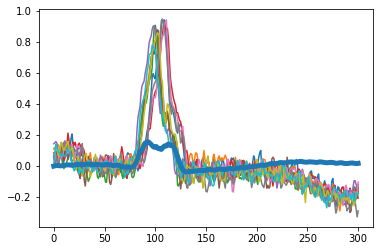

In [17]:
# Visualizar um batimento de treino/validacao
plt.plot(beats_train_val.iloc[:10,:-2].T);
plt.plot(beats_train_val.iloc[:,:-2].T.mean(axis=1),linewidth=5);

In [18]:
# Salvar arquivos de treino e teste sem filtro
beats_train_val.to_csv('../beats/beats_train_val'+ str(codigo[0]) + 'lead' + str(leads)+ 'raw.csv')
beats_teste.to_csv('../beats/beats_teste' + str(codigo[0])+ 'lead' +str(leads)+ 'raw.csv')

## Filtragem

Aplicar filtros

In [19]:
# Parametros Filtro Fir
fs = 500  #in Hz
high = 50 #in Hz
low = 0.5 #in Hz

In [20]:
# Filtro Fir Teste
fir_teste = pd.DataFrame()
N = len(beats_teste)
for x in range(N):
    fir_teste = fir_teste.append(pd.Series(
        filtro.denoise_fir(beats_teste.iloc[x, :-2], fs, high, low)), ignore_index=True)

/tmp/ipykernel_17922/3261230733.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fir_teste = fir_teste.append(pd.Series(
/tmp/ipykernel_17922/3261230733.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fir_teste = fir_teste.append(pd.Series(


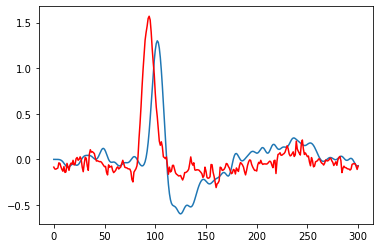

In [21]:
plt.plot(fir_teste.iloc[0])
plt.plot(beats_teste.iloc[0,:-2],'r')

In [22]:
# Filtro Fir Treino/Teste
fir_treino_val = pd.DataFrame()
N = len(beats_train_val)
for x in range(N):
    fir_treino_val = fir_treino_val.append(pd.Series(
        filtro.denoise_fir(beats_train_val.iloc[x, :-2], fs, high, low)), ignore_index=True)

/tmp/ipykernel_17922/3962810460.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fir_treino_val = fir_treino_val.append(pd.Series(
/tmp/ipykernel_17922/3962810460.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fir_treino_val = fir_treino_val.append(pd.Series(


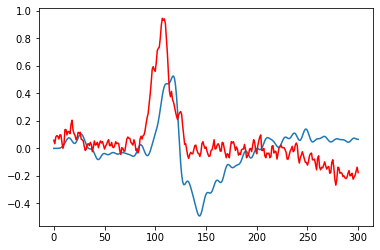

In [23]:
plt.plot(fir_treino_val.iloc[0])
plt.plot(beats_train_val.iloc[0,:-2],'r')

In [24]:
# Filtro Wave db2 Teste
db2_teste = pd.DataFrame()
N = len(beats_teste)
for x in range(N):
    db2_teste = db2_teste.append(pd.Series(
        filtro.denoise_wavelet(2,beats_teste.iloc[x, :-2])), ignore_index=True)

/tmp/ipykernel_17922/3543665644.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  db2_teste = db2_teste.append(pd.Series(
/tmp/ipykernel_17922/3543665644.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  db2_teste = db2_teste.append(pd.Series(


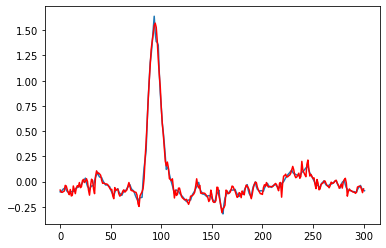

In [25]:
plt.plot(db2_teste.iloc[0])
plt.plot(beats_teste.iloc[0,:-2],'r')

In [26]:
# Filtro Wave db2 Treino/Teste
db2_treino_val = pd.DataFrame()
N = len(beats_train_val)
for x in range(N):
    db2_treino_val = db2_treino_val.append(pd.Series(
        filtro.denoise_wavelet(2,beats_train_val.iloc[x, :-2])), ignore_index=True)

/tmp/ipykernel_17922/3829020981.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  db2_treino_val = db2_treino_val.append(pd.Series(
/tmp/ipykernel_17922/3829020981.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  db2_treino_val = db2_treino_val.append(pd.Series(


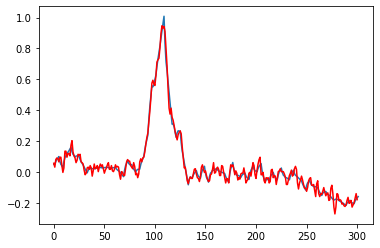

In [27]:
plt.plot(db2_treino_val.iloc[0])
plt.plot(beats_train_val.iloc[0,:-2],'r')

In [28]:
# Filtro Wave db6 Teste
db6_teste = pd.DataFrame()
N = len(beats_teste)
for x in range(N):
    db6_teste = db6_teste.append(pd.Series(
        filtro.denoise_wavelet(6,beats_teste.iloc[x, :-2])), ignore_index=True)

/tmp/ipykernel_17922/2644457125.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  db6_teste = db6_teste.append(pd.Series(
/tmp/ipykernel_17922/2644457125.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  db6_teste = db6_teste.append(pd.Series(


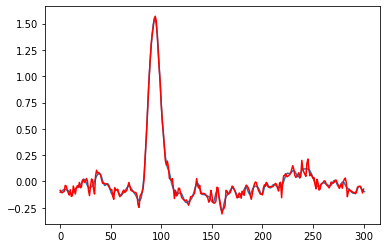

In [29]:
plt.plot(db6_teste.iloc[0])
plt.plot(beats_teste.iloc[0,:-2],'r')

In [30]:
# Filtro Wave db6 Treino/Teste
db6_treino_val = pd.DataFrame()
N = len(beats_train_val)
for x in range(N):
    db6_treino_val = db6_treino_val.append(pd.Series(
        filtro.denoise_wavelet(6,beats_train_val.iloc[x, :-2])), ignore_index=True)

/tmp/ipykernel_17922/1402639582.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  db6_treino_val = db6_treino_val.append(pd.Series(
/tmp/ipykernel_17922/1402639582.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  db6_treino_val = db6_treino_val.append(pd.Series(


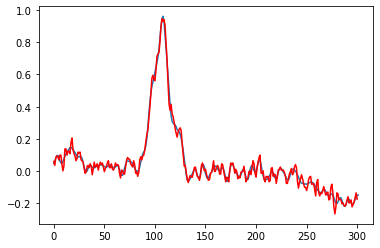

In [31]:
plt.plot(db6_treino_val.iloc[0])
plt.plot(beats_train_val.iloc[0,:-2],'r')

In [32]:
fir_treino_val.to_csv('../beats/beats_train_val'+ str(codigo[0]) + 'lead' + str(leads) + 'fir.csv')
fir_teste.to_csv('../beats/beats_teste' + str(codigo[0])+ 'lead' + str(leads) + 'fir.csv')
db2_treino_val.to_csv('../beats/beats_train_val'+ str(codigo[0]) + 'lead' + str(leads) + 'db2.csv')
db2_teste.to_csv('../beats/beats_teste' + str(codigo[0])+ 'lead' + str(leads) + 'db2.csv')
db6_treino_val.to_csv('../beats/beats_train_val'+ str(codigo[0]) + 'lead' + str(leads) + 'db6.csv')
db6_teste.to_csv('../beats/beats_teste' + str(codigo[0])+ 'lead' + str(leads) + 'db6.csv')